<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Assignment/1114-Python-machine-learning-ch09-recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 09.

## **01. 추천 시스템의 개요와 배경**

### 추천 시스템의 개요
- 추천 시스템의 진정한 묘미는 사용자 자신도 좋아하는지 몰랐던 취향을 시스템이 발견하고 그에 맞는 콘텐츠를 추천해주는 것임. 이러한 추천 시스템을 접한 사용자는 해당 사이트를 더 강하게 신뢰하 게 되어 더 많은 추천 콘텐츠를 선택하게 됨
- 결국 더 많은 데이터가 추천 시스템에 축적되면서 추천이 더욱 정확해지고 다양한 결과를 얻을 수 있는 좋은 선순환 시스템을 구축할 수 있게 됨

### 온라인 스토어의 필수 요소, 추천 시스템
- 한정된 시간이라는 제약을 가진 상황에서 너무 많은 상품과 콘텐츠는 오히려 사용자가 어떤 상품을 골라야 할지에 대한 압박감을 느끼게 만들 수밖에 없는데, 추천 시스템이 이러한 상황을 타개해줌.
- 좋은 추천 시스템은 사용자가 무엇을 원하는지 빠르게 찾아내 사용자의 온라인 쇼핑의 즐거움을 배가 함. 따라서 온라인 스토어에서 추천 시스템은 필수 구성 요소임

### 추천 시스템의 유형
- 추천 시스템은 크게 콘텐츠 기반 필터링(Content based filtering) 방식과 협업 필터링(Collaborative Filtering) 방식으로 나뉨
    - 협업 필터링 방식은 다시 최근접 이웃(Nearest Neighbor) 협업 필터링과 잠재 요인(Latent Factor) 협업 필터링으로 나뉨
- 추천 시스템의 초창기에는 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링이 주로 사용됐지만, 그 유명한 넷플릭스 추천 시스템 경연 대회에서 행렬 분해(Matrix Factorization) 기법을 이용한 잠재 요인 협업 필터링 방식이 우승하면서 대부분의 온라인 스토어에서 잠재 요인 협업 필터링 기반의 추천 시스템을 적용함
- 하지만 서비스하는 아이템의 특성에 따라 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링 방식을 유지하는 사이트도 많으며, 특히 아마존의 경우는 아직도 아이템 기반의 최근접 이웃 협업 필터링 방식을 추천 엔진으로 사용함
- 요즘에는 개인화 특성을 좀 더 강화 하기 위해서 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 늘고 있음

## **02. 콘텐츠 기반 필터링 추천 시스템**
- 콘텐츠 기반 필터링 방식: 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식
    - 예를 들어 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천해주는 방식

## **03. 최근접 이웃 협업 필터링**
- 협업 필터링(Collaborative Filtering): 친구들에게 물어보는 것과 유사한 방식으로, 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것
- 협업 필터링의 주요 목표는 사용자-아이템 평점 매트릭스와 같은 축적된 사용 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것임
- 협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며, 두 방식 모두 사용자 아이템 평점 행렬 데이터에만 의지해 추천을 수행함
    - 협업 필터링 알고리즘에 사용되는 사용자 아이템 평점 행렬에서 행(Row)은 개별 사용자, 열
(Column)은 개별 아이템으로 구성되며, 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태가 돼야 함

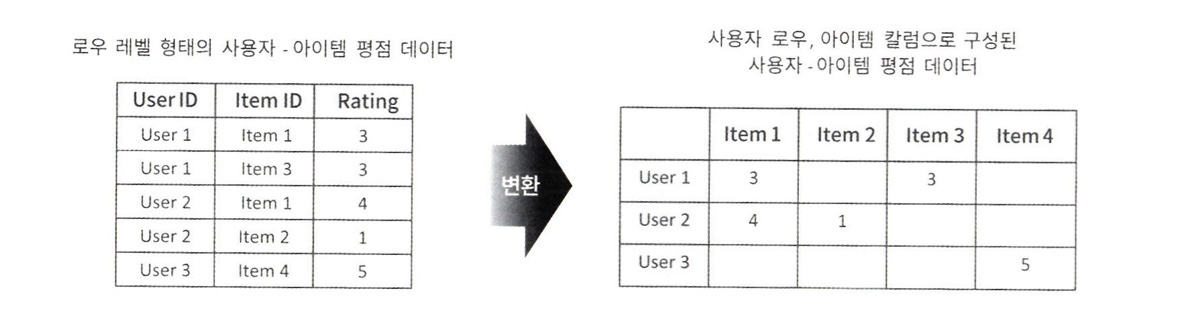


- 일반적으로 이러한 사용자 아이템 평점 행렬은 많은 아이템을 열로 가지는 다차원 행렬이며, 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬(Sparse Matrix) 특성을 가지고 있음
- 최근접 이웃 협업 필터링은 메모리(Memory) 협업 필터링이라고도 하며, 일반적으로 사용자 기반과 아이템 기반으로 다시 나뉠 수 있음
    - 사용자 기반(User-User): 당신과 비슷한 고객들이 다음 상품도 구매했습니다
    - 아이템 기반(Iterm-Item): 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다
- 사용자 기반 최근접 이웃 방식: 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 이 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식
    - 즉, 특성 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 것임

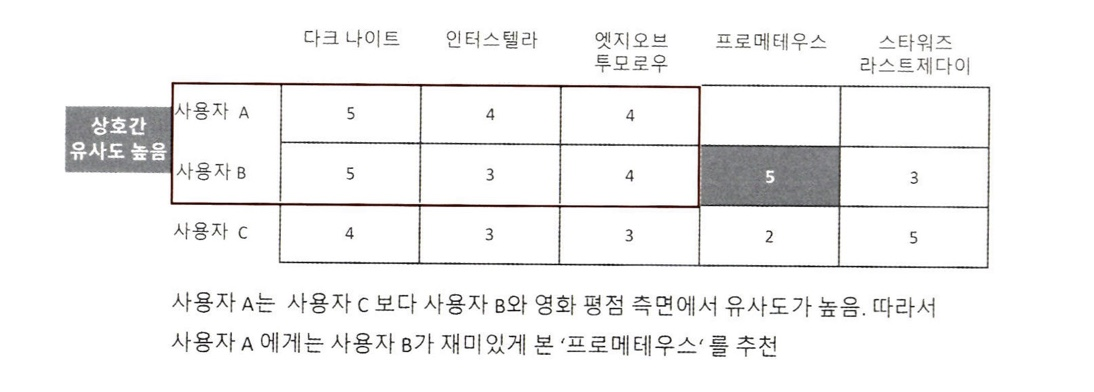

- 아이템 기반 최근접 이웃 방식: 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘

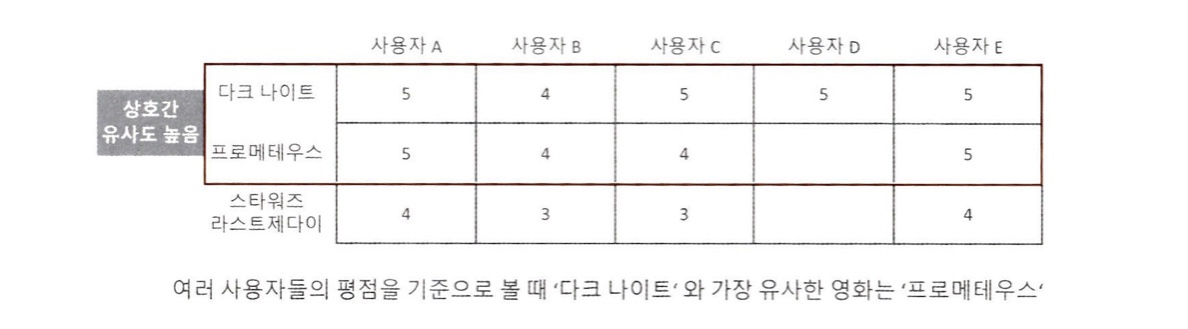




- 일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높음.
    - 이유는 비슷한 영화(또는 상품)를 좋아(또는 구입)한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문임
- 따라서 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘을 적용함
- 추천 시스템에 사용되는 피처 벡터화된 텍스트 데이터와 동일하게 다차원 희소 행렬이라는 특징이 있으므로 유사도 측정을 위해 주로 코사인 유사도를 이용함

## **04. 잠재 요인 협업 필터링**

### 잠재 요인 협업 필터링의 이해
- 잠재 요인 협업 필터링: 사용자 아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
- 행렬 분해(Matrix Factorization): 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출하는 기법
- 잠재 요인 협업 필터링은 사용자 아이템 평점 행렬 데이터만을 이용해 말 그대로 '잠재 요인'을 끄집어 내는 것을 의미함
    - 잠재 요인을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자 잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬(즉, 잠재 요인-아이템 행렬)로 분해할 수 있으며, 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자 아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성하는 것이 잠재 요인 협력 필터링 알고리즘의 골자임

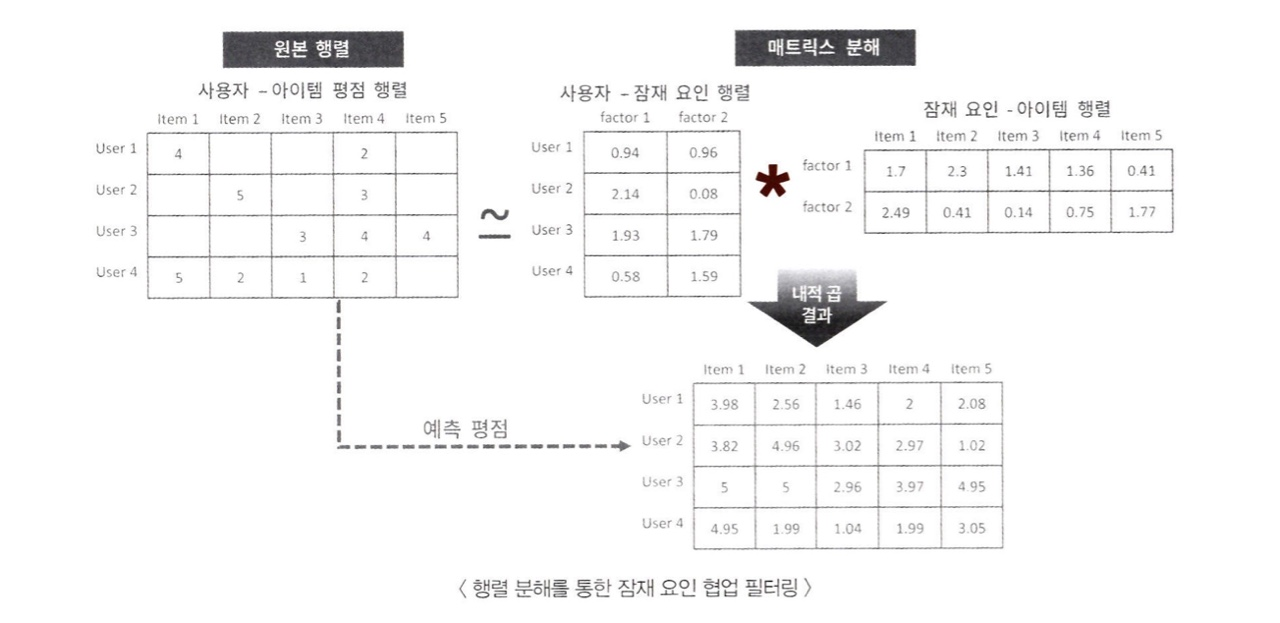

- 가령 영화 평점 기반의 사용자-아이템 평점 행렬 데이터라면 영화가 가지는 장르별 특성 선호도로 가정할 수 있음
- 즉, 사용자-잠재 요인 행렬은 사용자의 영화 장르에 대한 선호도로, 아이템-잠재 요인 행렬은 영화의 장르별 특성값으로 정의할 수 있음
- 사용자-아이템 평점 행렬 R에서 사용자(User)의 아이템(Item)에 대한 평점을 R(u,i)라고 함
    - 여기서 u: 사용자 아이디, i: 아이템 아이디
- 사용자-잠재 요인 행렬을 사용자의 영화 장르별 선호도 행렬 P로 가정하고 factor 1을 액션(Action) 선호도, factor 2를 로맨스(Romance) 선호도로 설정함
- 아이템-잠재 요인 행렬은 영화별로 여러 장르 요소로 구성된 영화의 장르별 요소 행렬 Q로 가정하고 factor 1은 영화의 Action 요소 값, factor 2는 Romance 요소 값임

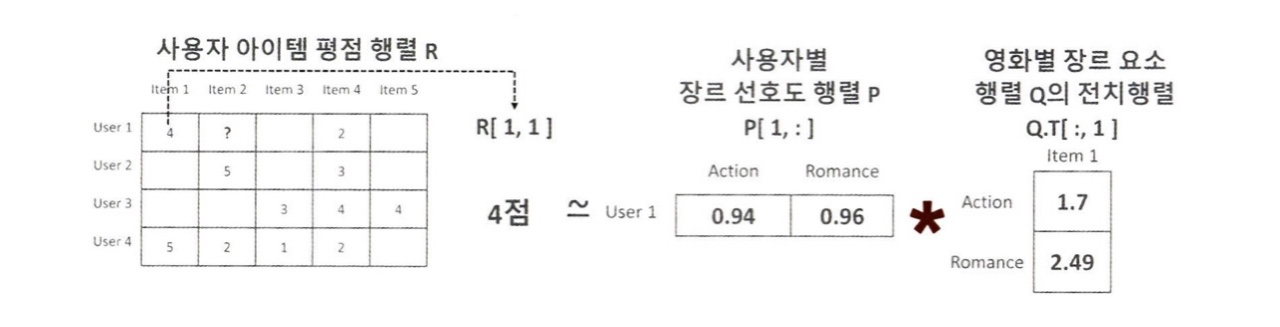

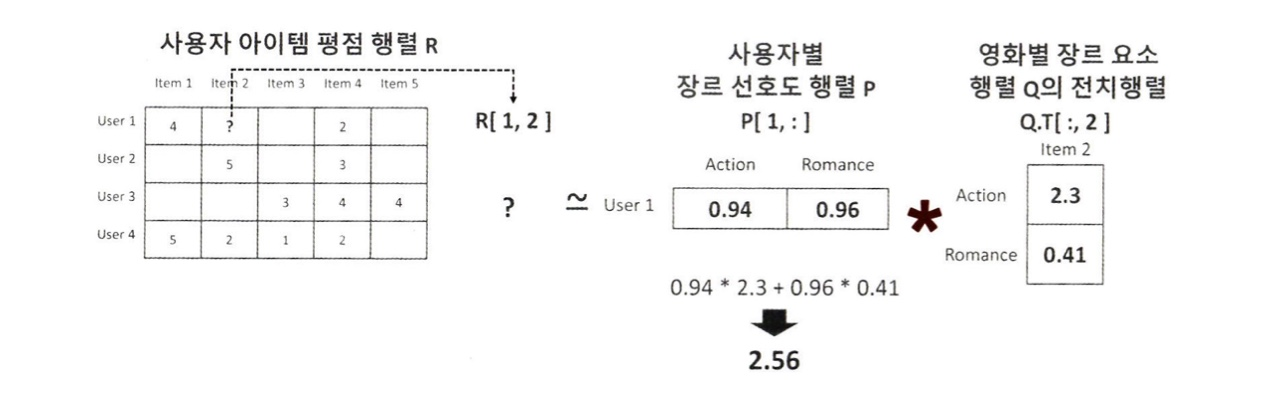

### 행렬 분해의 이해
- 행렬 분해는 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 SVD(Singular Vector Decomposition), NMF(Non-Negative Matrix Factorization) 등이 있음
- M개의 사용자(User) 행과 N개의 아이템(Item) 열을 가진 평점 행렬 R은 M X N 차원으로 구성되며, 행렬 분해를 통해서 사용자-K 차원 잠재 요인 행렬 P(P는 M X K 차원)와 K 차원 잠재 요인 - 아이템 행렬 Q.T(Q.T는 K X N 차원)로 분해될 수 있음
    - Q: 아이템-잠재 요인 행렬
    - Q.T: Q의 전치 행렬인 잠재 요인-아이템 행렬

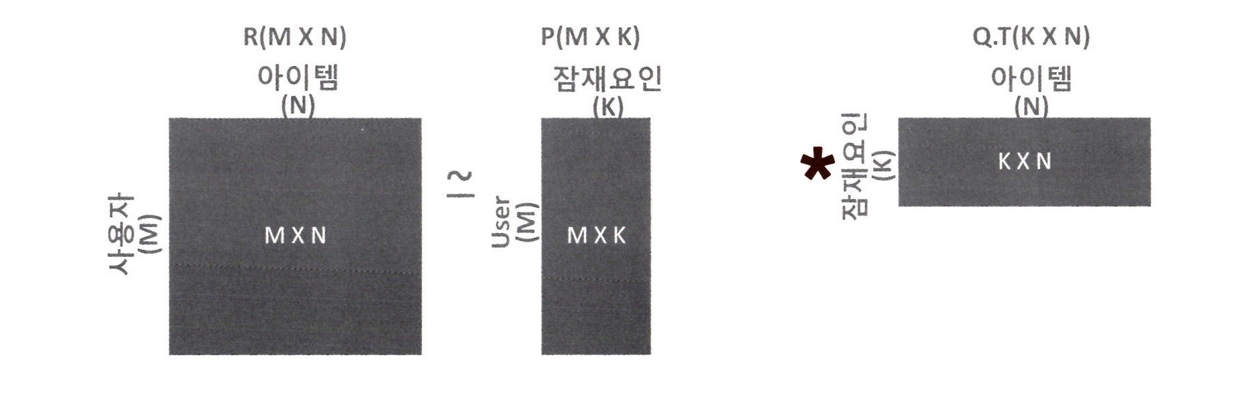



- 즉, **R=P*Q.T**이며 각 기호에 대한 설명 다음과 같음
    - M: 총 사용자 수
    - N: 총 아이템 수
    - K: 잠재 요인의 차원 수
    - R: M X N 차원의 사용자-아이템 평점 행렬
    - P: 사용자와 잠재 요인과의 관계 값을 가지는 M X K 차원의 사용자-잠재 요인 행렬
    - Q: 아이템과 잠재 요인과의 관계 값을 가지는 N X K 차원의 아이템-잠재 요인 행렬
    - Q.T: Q 매트릭스의 행과 열 값을 교환한 전치 행렬

- 예를 들어, 행렬 내에 널(NaN) 값을 많이 가지는 고차원의 희소 행렬인 R 행렬은 다음 그림과 같이 저차원의 밀집 행렬인 P 행렬과 Q 행렬로 분해될 수 있음

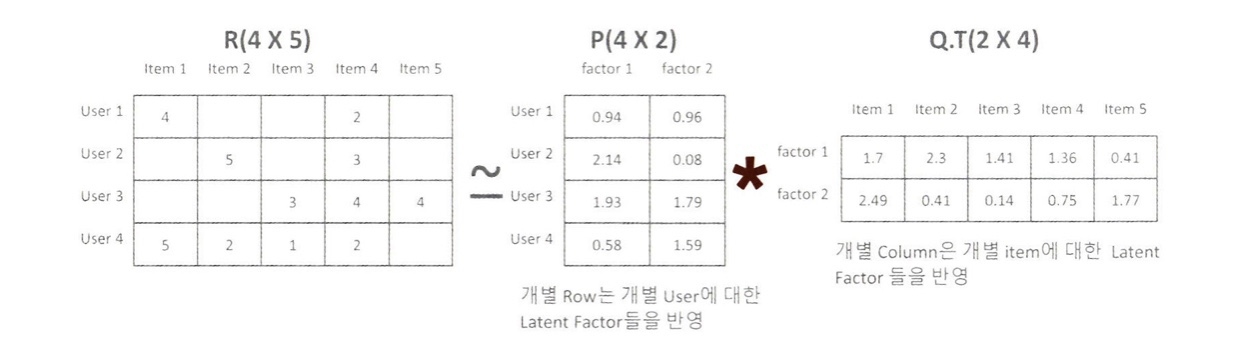

- R 행렬의 u행 사용자와 i열 아이템 위치에 있는 평점 데이터를 $r_{(u,i)}$라고 하면 $r_{(u,i)} = p_u * q_i^t$  
    - $p_u$: P 행렬에서 u행 사용자의 벡터
    - $q_i^t$: Q 행렬의 i행 아이템 벡터의 전치 벡터

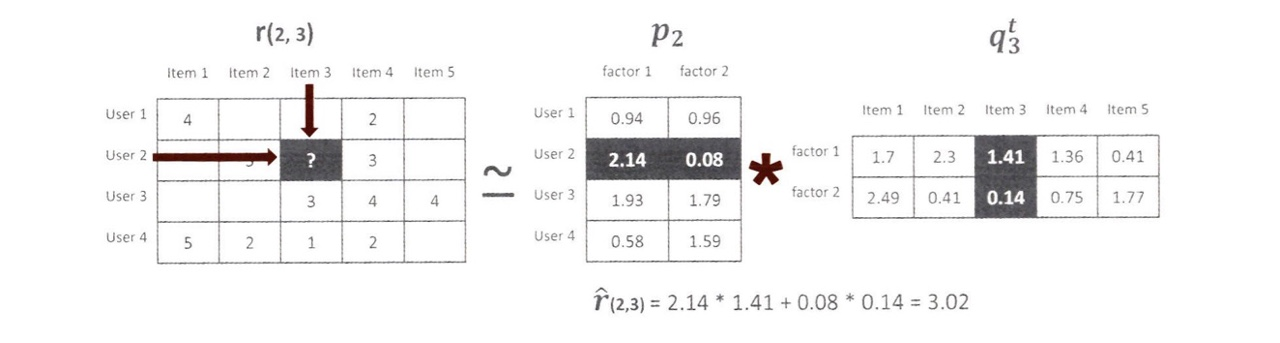

- 사용자-아이템 평점 행렬의 미정 값을 포함한 모든 평점 값은 행렬 분해를 통해 얻어진 P 행렬과 Q.T 행렬의 내적을 통해 예측 평점으로 다시 계산할 수 있음
$$ R \cong \hat{R} = P*Q.T $$

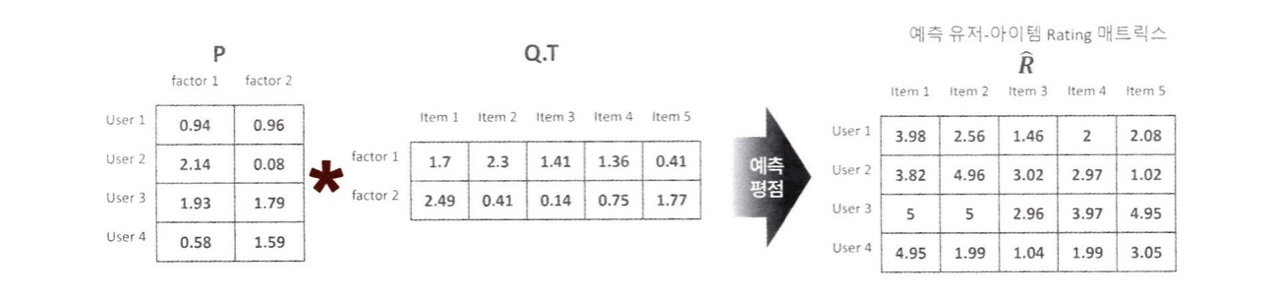

- 행렬 분해는 주로 SVD(Singular Value Decomposition) 방식을 이용함
    - 하지만 SVD는 널(NaN) 값이 없는 행렬에만 적용할 수 있음
    - R 행렬에는 아직 평점이 되지 않은 많은 널 값이 있기 때문에 P와 Q 행렬을 일반적인  SVD 방식으로는 분해할 수 없음
- 확률적 경사 하강법(Stochastic Gradient Descent, SGD)이나 ALS(Alternating Least Squares) 방식을 이용해 SVD를 수행함

### 확률적 경사 하강법을 이용한 행렬 분해
- P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것
    1. P와 Q를 임의의 값을 가진 행렬로 설정함
    2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산함
    3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트함
    4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화함

- 실제 값과 예측값의 오류 최소화와 L2 규제(Regularization)를 고려한 비용 함수식
$$min \sum (r_{(u,i)}-p_u q_{i}^{t})^2 + \lambda (\left\|q_i\right\|^2 + \left\|p_u\right\|^2)$$

- 일반적으로 사용자-아이템 평점 행렬의 경우 행렬 분해를 위해서 단순히 예측 오류값의 최소화와 학습 시 과적합을 피하기 위해서 규제를 반영한 비용 함수를 적용함
- 위의 비용 함수를 최소화하기 위해서 새롭게 업데이트됨
$$ \acute{p_u} = p_u + \eta (e_{(u,i)}*q_i - \lambda*p_u) $$
$$ \acute{q_i} = q_i + \eta (e_{(u,i)}*p_u - \lambda*q_i) $$
    - $p_u$: P 행렬의 사용자 u행 벡터
    - $q_i^t$: 행렬의 아이템 i행의 전치 벡터
    - $r_{(u,i)}$: 실제 R 행렬의 u행, i열에 위치한 값
    - $\hat{r}_{(u,i)}$: 예측 $\hat{R}$ 행렬의 u행, i열에 위치한 $p_u * q_i^t$로 계산
    - $e_{(u,i)}$: u행, i열에 위치한 실제 행렬 값과 예측 행렬 값의 차이 오류. $r_{(u,i)}-\hat{r}_{(u,i)}$로 계산
    - η: SGD 학습률
    - λ: L2 규제(Regularization) 계수
- L2 규제를 반영해 실제 R 행렬 값과 예측 R 행렬 값의 차이를 최소화하는 방향성을 가지고 P행렬과 Q행렬에 업데이트 값을 반복적으로 수행하면서 최적화된 예측 R 행렬을 구하는 방식이 SGD 기반의 행렬 분해임

*분해하려는 원본 행렬 R을 P와 Q로 분해한 뒤에 다시 P와 Q.T의 내적으로 예측 행렬을 만드는 예제*
- 원본 행렬 R을 미정인 널 값(np.NaN)을 포함해 생성하고 분해 행렬 P와 Q는 정규 분포를 가진 랜덤 값으로 초기화

In [1]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

- 실제 R 행렬과 예측 행렬의 오차를 구하는 `get_rmse()` 함수를 만들기
    - 실제 R 행렬의 널이 아닌 행렬 값의 위치 인덱스를 추출해 이 인덱스에 있는 실제 R 행렬 값과 분해된 P, Q를 이용해 다시 조합된 예측 행렬 값의 RMSE 값을 반환

In [2]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

- SGD 기반으로 행렬 분해 수행
    - R에서 널 값을 제외한 데이터의 행렬 인덱스 추출
        - steps: SGD를 반복해서 업데이트할 횟수
        - learning_rate: SGD의 학습률
        - r_lambda: L2 Regularization 계수
    - `get_rmse()` 함수를 통해 50회 반복할 때마다 오류 값 출력

In [3]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i,:], Q[j,:].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0:
        print("### iteration step: ", step," rmse: ", rmse)

### iteration step:  0  rmse:  3.2388050277987723
### iteration step:  50  rmse:  0.4876723101369648
### iteration step:  100  rmse:  0.1564340384819247
### iteration step:  150  rmse:  0.07455141311978046
### iteration step:  200  rmse:  0.04325226798579314
### iteration step:  250  rmse:  0.029248328780878973
### iteration step:  300  rmse:  0.022621116143829466
### iteration step:  350  rmse:  0.019493636196525135
### iteration step:  400  rmse:  0.018022719092132704
### iteration step:  450  rmse:  0.01731968595344266
### iteration step:  500  rmse:  0.016973657887570753
### iteration step:  550  rmse:  0.016796804595895633
### iteration step:  600  rmse:  0.01670132290188466
### iteration step:  650  rmse:  0.01664473691247669
### iteration step:  700  rmse:  0.016605910068210026
### iteration step:  750  rmse:  0.016574200475705
### iteration step:  800  rmse:  0.01654431582921597
### iteration step:  850  rmse:  0.01651375177473524
### iteration step:  900  rmse:  0.016481465738

- 분해된 P와 Q 함수를 P*Q.T로 예측 행렬을 만들어 출력

In [4]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


&rarr; 원본 행렬과 비교해 널이 아닌 값은 큰 차이가 나지 않으며, 널인 값은 새로운 예측값으로 채워짐